# Практическая работа 1 Журавлев Александр Дмитриевич

# 1) 01-task-train-test-split

In [24]:
import pandas as pd

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# загрузим данные из репозетория и выведем головные строки
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
                "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will","word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit","word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
                "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab","word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data",
                "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm","word_freq_direct", "word_freq_cs",
                "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;",
                "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "spam_or_non-spam_classes"]

data = pd.read_csv(url, names=column_names)
print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

# Проанализируем на сбалансированность классов

In [27]:
# Подсчет количества примеров классов
class_counts = data['spam_or_non-spam_classes'].value_counts()

# Печать количества примеров классов и их процентного соотношения
print(class_counts)
print("Соотношение классов:")
print(class_counts / len(data))

0    2788
1    1813
Name: spam_or_non-spam_classes, dtype: int64
Соотношение классов:
0    0.605955
1    0.394045
Name: spam_or_non-spam_classes, dtype: float64


# Разобьем на тестовую и обущающую как 80|20 и 70|30

In [28]:
# 70|30
split_70_30 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split_70_30.split(data, data["spam_or_non-spam_classes"]):
    train_set_70_30 = data.loc[train_index]
    test_set_70_30 = data.loc[test_index]

# Вывод 70|30
print("70/30")
print("Обучающая выборка ", train_set_70_30.shape)
print("Тестовый набор ", test_set_70_30.shape)

70/30
Обучающая выборка  (3220, 58)
Тестовый набор  (1381, 58)


In [29]:
# 80|20    
split_80_20 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_80_20.split(data, data["spam_or_non-spam_classes"]):
    train_set_80_20 = data.loc[train_index]
    test_set_80_20 = data.loc[test_index]
# Вывод 80|20
print("80/20")
print("Обучающая выборка ", train_set_80_20.shape)
print("Тестовый набор ", test_set_80_20.shape)

80/20
Обучающая выборка  (3680, 58)
Тестовый набор  (921, 58)


# 2) 02-task-standardize-data

# NSFG

In [30]:
# Читаем файл из рабочей области
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

# Выводим строки и столбцы
print(nsfg.shape)
print(nsfg.columns)

ounces = nsfg['birthwgt_oz1']

# Отобразим 5 головных элементов
print(ounces.head(5))

nsfg['nbrnaliv'].value_counts()

# В 8 строке изменим значение
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# Выведем значения с частотой нахождения в файле
print("")
print(nsfg['nbrnaliv'].value_counts())

# Запись переменных
nsfg['agecon'].describe()
nsfg['agepreg'].describe()

# Делим колонки на 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Находим разницу
preg_length = agepreg - agecon


print(preg_length.describe())

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64
count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


# гистограмма

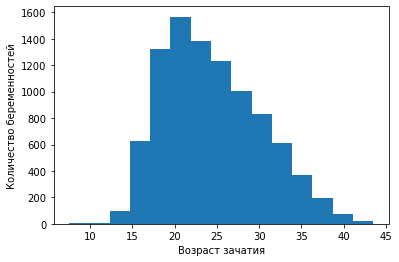

In [31]:
plt.hist(agecon, bins=15)
plt.xlabel("Возраст зачатия")
plt.ylabel('Количество беременностей')
plt.show()

# Масса тела при рождении

In [32]:
# Перебор строк
def resample_rows_weighted(df, column='wgt2013_2015'):
    """Resamples a DataFrame using probabilities proportional to given column.
    Args:
        df: DataFrame
        column: string column name to use as weights
    returns:
        DataFrame
    """
    weights = df[column].copy()
    weights /= sum(weights)
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

# Вычисляем среднюю массу тела детей
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)
birth_weight = pounds + ounces/16
full_term = nsfg['prglngth'] >= 37
full_term_weight = birth_weight[full_term]

print("Масса тела: ", full_term_weight.mean())

# Фильтрация
full_term = nsfg['prglngth'] >= 37
single = nsfg['nbrnaliv'] == 1
single_full_term_weight = birth_weight[single & full_term]
print('Единовременное среднее значение:', single_full_term_weight.mean())

mult_full_term_weight = birth_weight[~single & full_term]
print('Многократное среднее значение:', mult_full_term_weight.mean())

Масса тела:  7.425793792365323
Единовременное среднее значение: 7.440501888828926
Многократное среднее значение: 5.6861702127659575


# Нормализация данных (agepreg и agecon)

In [33]:
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

# Отобразим строки и столбцы
print(nsfg.shape)
print(nsfg.columns)

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')


# Проведем нормализацию даннных на примере разницы двух столбцов "agecon" и "agepreg" из набора данных NSFG

In [34]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100
preg_length = agepreg - agecon
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


# Нормализация данных Wine

In [35]:
column_names = ["Type", "Alcohol", "Malic", "acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

wine = pd.read_csv('wine_types.csv')


# Выведем значение дисперсии столбцов в наборе данных wine
print(wine.head())

wine.describe()

   Type  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0     1    14.23        1.71  2.43               15.6        127   
1     1    13.20        1.78  2.14               11.2        100   
2     1    13.16        2.36  2.67               18.6        101   
3     1    14.37        1.95  2.50               16.8        113   
4     1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05        

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [36]:
# Посмотрим отклонение столбца Proline
print("Отклонение столбца Proline", wine['Proline'].var())
wine['Proline_log'] = np.log(wine['Proline'])
# Посмотрим отклонение нормализированного столбца Proline
print("Отклонение нормализированного столбца Proline", wine['Proline_log'].var())

Отклонение столбца Proline 99166.71735542428
Отклонение нормализированного столбца Proline 0.17231366191842018


# Вызовем функцию describe() для столбцов ‘Ash’, ‘Alcalinity of ash’, ‘Magnesium’

In [37]:
wine[['Ash', 'Alcalinity of ash', 'Magnesium']].describe()

,Ash,Alcalinity of ash,Magnesium
count,178.000000,178.000000,178.000000
mean,2.366517,19.494944,99.741573
std,0.274344,3.339564,14.282484
min,1.360000,10.600000,70.000000
25%,2.210000,17.200000,88.000000
50%,2.360000,19.500000,98.000000
75%,2.557500,21.500000,107.000000
max,3.230000,30.000000,162.000000


# Стандартизируем данные

In [38]:
# Создание Scaler
ss = StandardScaler()

# Берем данные
wine_subset = wine[['Ash', 'Alcalinity of ash', 'Magnesium']]

print(wine_subset.iloc[:3])

# Применим масштабирование к данным
wine_subset_scaled = ss.fit_transform(wine_subset)
# Выведем результат
print(wine_subset_scaled[:3])

    Ash  Alcalinity of ash  Magnesium
0  2.43               15.6        127
1  2.14               11.2        100
2  2.67               18.6        101
[[ 0.23205254 -1.16959318  1.91390522]
 [-0.82799632 -2.49084714  0.01814502]
 [ 1.10933436 -0.2687382   0.08835836]]


# Расчет точности обучения для не стандартизированных данных

In [39]:
wine = pd.read_csv('wine_types.csv')
X = wine.drop('Type', axis=1)
y = wine['Type']

knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn.fit(X_train, y_train)

print("Точность для не стандартизированных данных", knn.score(X_test, y_test))

Точность для не стандартизированных данных 0.7777777777777778


# Расчет точности обучения для стандартизированных данных

In [40]:
knn = KNeighborsClassifier()

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
knn.fit(X_train, y_train)

print("Точность для стандартизированных данных ", knn.score(X_test, y_test))

Точность для стандартизированных данных  0.9777777777777777


# 3) 03-task-linear-algebra

# Транспонирование транспонированной матрицы это сама матрица

In [41]:
# Создадим произвольную матрицу
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])
print("Изначальная матрица:")
print(A)

# Транспонирование матрицы
A_transpose = A.T
print("Транспонированная исходная матрица:")
print(A_transpose)

# Транспонирование транспонированной матрицы
A_transpose_transpose = A_transpose.T
print("Транспонирование ранее транспонированной матрицы:")
print(A_transpose_transpose)

Изначальная матрица:
[[1 2]
 [3 4]
 [5 6]]
Транспонированная исходная матрица:
[[1 3 5]
 [2 4 6]]
Транспонирование ранее транспонированной матрицы:
[[1 2]
 [3 4]
 [5 6]]


# Для матриц A и B докажем, что сумма и транспозиция коммутируют

In [44]:
a = np.array([[3, 5], [6, 2]])
b = np.array([[9, 1], [7, 3]])

# Вычислим сумму двух матриц
print(a)
print(b)

summa_aib = a + b
print("Сумма матриц")
print(summa_aib)

# Транспонируем
transpose_summa_aib = np.transpose(summa_aib)
print("Транспонирование матрицы")
print(transpose_summa_aib)

# Транспонируем матрицы и вычисляем сумму траспонированных матриц
transpose_a = np.transpose(a)
print("Транспонированная матрица a")
print(transpose_a)

transpose_b = np.transpose(b)
print("Транспонированная матрица b")
print(transpose_b)

summa_transpose_ab = transpose_a + transpose_b
print("Сумма транспонированных матриц")
print(summa_transpose_ab)
if np.array_equal(transpose_summa_aib, summa_transpose_ab):
    print("Сумма и транспозиция коммутируют")

[[3 5]
 [6 2]]
[[9 1]
 [7 3]]
Сумма матриц
[[12  6]
 [13  5]]
Транспонирование матрицы
[[12 13]
 [ 6  5]]
Транспонированная матрица a
[[3 6]
 [5 2]]
Транспонированная матрица b
[[9 7]
 [1 3]]
Сумма транспонированных матриц
[[12 13]
 [ 6  5]]
Сумма и транспозиция коммутируют


# Доказательство того, что для любой квадратичной матрицы, сумма матриц симметрична

In [48]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

summa = a + b

# Транспонируем сумму матриц
c = np.transpose(summa)

# Транспонируем матрицу A
transpose_a = np.transpose(a)

# Транспонируем матрицу B
transpose_b = np.transpose(b)

# Сумма транспонированных матриц
sum_transpose = transpose_a + transpose_b
print("Сумма транспонированных матриц:")
print(sum_transpose)

# Выводим сумму матриц и транспонированную матрицу с
print("Сумма матриц a и b")
print(summa)
print("Транспонированная матрица")
print(c)

# Проверка на симметричность
print("Проверка на эквивалентность суммы матриц с транспонированием матрицы и суммы транспонирования матриц")
print(np.array_equal(summa, c))
print("Проверка на эквивалентность суммы матриц с суммой транспонирования матриц")
print(np.array_equal(summa, sum_transpose))

Сумма транспонированных матриц:
[[10 10 10]
 [10 10 10]
 [10 10 10]]
Сумма матриц a и b
[[10 10 10]
 [10 10 10]
 [10 10 10]]
Транспонированная матрица
[[10 10 10]
 [10 10 10]
 [10 10 10]]
Проверка на эквивалентность суммы матриц с транспонированием матрицы и суммы транспонирования матриц
True
Проверка на эквивалентность суммы матриц с суммой транспонирования матриц
True


# Мы определяли тензор `X` размерности (2, 3, 4). Что возвращает функция `len(X)`?

In [49]:
X = np.zeros((2, 3, 4))
print(len(X))

2


# Для тензора `X` произвольной размерности, всегда ли функция `len(X)` возвращает длину тензора по оси `X`?

In [51]:
X = np.array([[6, 3, 1],
              [9, 4, 5]])

print(X)

# Посчитаем число строк
print("Строки")
print(len(X))

# Посчитаем число столбцов
print("Столбцы")
print(len(X[0]))

print("Не всегда")

[[6 3 1]
 [9 4 5]]
Строки
2
Столбцы
3
Не всегда


# Запустите следующий фрагмент кода `A / A.sum(axis=1)` и проверьте полученный результат

In [52]:
A = np.array([[3, 5],
              [8, 1]])

print(A / A.sum(axis=1))

[[0.375      0.55555556]
 [1.         0.11111111]]


# Рассмотрим тензор размерности (2, 3, 4)

In [53]:
# Создадим тензор размерности (2, 3, 4)
tensor = np.arange(24).reshape(2, 3, 4)
print(tensor)

# Суммируем элементы по осям
sum_axis0 = np.sum(tensor, axis=0)
sum_axis1 = np.sum(tensor, axis=1)
sum_axis2 = np.sum(tensor, axis=2)

print("Размерности после суммирования:")
print("По оси 0", sum_axis0.shape)
print("По оси 1", sum_axis1.shape)
print("По оси 2", sum_axis2.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Размерности после суммирования:
По оси 0 (3, 4)
По оси 1 (2, 4)
По оси 2 (2, 3)


# Передайте тензор с 3 или более осями в функцию `linalg.norm` и наблюдайте за его выводом

In [54]:
# Создадим тензор
array_3d = np.array([[[3, 4, 5], [8, 6, 1]], [[9, 3, 5], [7, 2, 6]]])

# Вычислим нормы трехмерного тензора
norm_3d = np.linalg.norm(array_3d)
print("Норма тензора")
print(norm_3d)

Норма тензора
18.841443681416774


# Определите 3 матрицы, содержащие случайные переменные, распределенные по нормальному закону распределения

In [55]:
a = np.random.randn(2**10, 2**16)
b = np.random.randn(2**16, 2**5)
c = np.random.randn(2**5, 2**14)

# Высчитываем (ab)c
preresult1 = np.dot(a, b)
result1 = np.dot(preresult1, c)
print(result1)

# Высчитываем a(bc)
preresult2 = np.dot(b, c)
result2 = np.dot(a, preresult2)
print(result2)

[[ 1512.39906381  -203.13261888  2132.9216946  ...  1933.84752273
  -1278.22602771   843.73681715]
 [  369.41873691  -521.97929788   303.01697563 ...  2642.29425683
    153.54688444   153.20433575]
 [  790.04011468  -286.58520877  -334.79056082 ...    -4.9640751
   -317.11215326   319.03837338]
 ...
 [    4.21195894  1323.66146249  3925.1217927  ...  -806.1545766
   -330.41006245 -1469.48723111]
 [ -651.14590587 -1754.04380681 -1048.66643076 ...  -869.09828012
   -914.49585658 -3137.43328041]
 [ 2263.33145535   588.4546994    420.03220301 ...   -70.51397129
    -50.01965215  1957.57924926]]
[[ 1512.39906381  -203.13261888  2132.9216946  ...  1933.84752273
  -1278.22602771   843.73681715]
 [  369.41873691  -521.97929788   303.01697563 ...  2642.29425683
    153.54688444   153.20433575]
 [  790.04011468  -286.58520877  -334.79056082 ...    -4.9640751
   -317.11215326   319.03837338]
 ...
 [    4.21195894  1323.66146249  3925.1217927  ...  -806.1545766
   -330.41006245 -1469.48723111]
 [ 

# Определите 3 матрицы. Сформируем тензор с 3-мя осями путем объединения матриц

In [56]:
a = np.random.rand(100, 200)
b = np.random.rand(100, 200)
c = np.random.rand(100, 200)

# Создание тензора с тремя осями
tensor = np.array([a, b, c])
print(tensor)
# Размерность сформированного тензора
print("Размерность тензора:", tensor.shape)

# Восстанавливаем матрицу b
b_restored = tensor[1]
print(b_restored)
if np.array_equal(b, b_restored):
  print("Матрицы b совпадают")

[[[0.28485208 0.61635503 0.68335344 ... 0.26805694 0.8552734  0.74878412]
  [0.364682   0.27497022 0.77256129 ... 0.73839166 0.2843865  0.74024156]
  [0.47137606 0.10848164 0.17295812 ... 0.31126764 0.4938937  0.94964961]
  ...
  [0.3429443  0.61619587 0.92193124 ... 0.70752861 0.10178843 0.76579282]
  [0.88576464 0.24237372 0.39216098 ... 0.10086539 0.73654625 0.30446601]
  [0.47447433 0.54575945 0.43942941 ... 0.9218635  0.53671466 0.19134819]]

 [[0.98920191 0.13605424 0.55973732 ... 0.98713473 0.58359377 0.74988133]
  [0.06198959 0.11072755 0.39718589 ... 0.62750445 0.787239   0.37589644]
  [0.08717473 0.33608596 0.00639246 ... 0.32908561 0.4658421  0.13544846]
  ...
  [0.72467771 0.80299569 0.68803919 ... 0.59036826 0.43643971 0.00253658]
  [0.35297543 0.25747626 0.78756912 ... 0.38241976 0.35510465 0.29636333]
  [0.04668677 0.77684943 0.79546115 ... 0.67910282 0.50557338 0.18799352]]

 [[0.3010397  0.9525727  0.93045558 ... 0.15541569 0.76937855 0.84614465]
  [0.07827586 0.691051